# Sea ice diagnostics

## Load modules and seaice diagnostic

In [1]:
import sys
sys.path.append("../../")
from seaice import SeaIceExtent

## Setup definition

The setup to be included in the diagnostic is defined in the following cell. 
The setup is defined by two variables:
- `mySetups`: a list of dictionaries with model-exp-source combinations to be included in the diagnostic, together with the observational dataset to be used as reference. Additional keyword that can be used are `regrid` if the model output needs to be regridded, `var` if the variable name in the model output is different from the one in the observational dataset, and `"timespan": [beginning, end]` if you want to retrieve only a timespan of the data (under development)
- `myRegions`: a list of regions to be included in the diagnostic. If no list is provided, the diagnostic will be performed on all the available regions.

In [2]:
mySetups = [{"model": "IFS-NEMO", "exp": "historical-1990", "source": "lra-r100-monthly"},
            {"model": "OSI-SAF", "exp": "osi-450", "source": "nh-monthly"},
            {"model": "OSI-SAF", "exp": "osi-450", "source": "sh-monthly"}]

# List of all the regions where SIE can be calculated:
# MyRegions = ["Arctic", "Hudson Bay", "Southern Ocean", "Ross Sea", "Weddell Sea",
#              "Amundsen-Bellingshausen Seas", "Pacific Ocean", "Indian Ocean"]

MyRegions = ["Arctic", "Southern Ocean"]

config_file = {"models": mySetups, "regions": MyRegions}

In [3]:
print(config_file)

{'models': [{'model': 'IFS-NEMO', 'exp': 'historical-1990', 'source': 'lra-r100-monthly'}, {'model': 'OSI-SAF', 'exp': 'osi-450', 'source': 'nh-monthly'}, {'model': 'OSI-SAF', 'exp': 'osi-450', 'source': 'sh-monthly'}], 'regions': ['Arctic', 'Southern Ocean']}


## Class initialization

In [4]:
diagnostic = SeaIceExtent(config=config_file, loglevel='INFO')

2024-02-08 12:33:40 :: Seaice :: INFO     -> Using default output directory /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/


## Run the diagnostic - run() method

The simplest way to run the diagnostic is to use the `run()` method.
This will compute the diagnostic for each setup and region defined in the previous cell, plot the data and store the netCDF files.

2024-02-08 12:33:40 :: Seaice :: INFO     -> Retrieving data for IFS-NEMO historical-1990 lra-r100-monthly


2024-02-08 12:33:41 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-02-08 12:33:41 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-08 12:33:41 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-08 12:33:41 :: Reader :: INFO     -> Grid metadata is lon-lat
2024-02-08 12:33:44 :: Reader :: INFO     -> Retrieving variables: ['avg_siconc']
/LUMI_TYKKY_Id5XXYM/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  'dims': dict(self._ds.dims),
2024-02-08 12:33:53 :: Seaice :: WARNING  -> Using timespan based on data availability
2024-02-08 12:33:

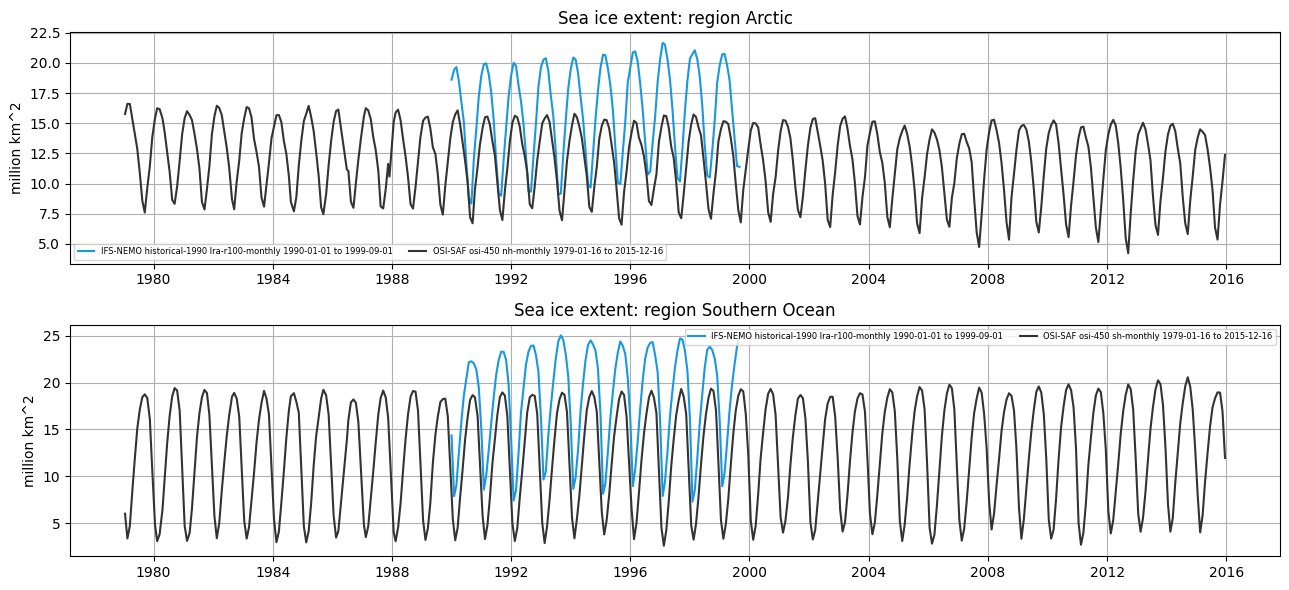

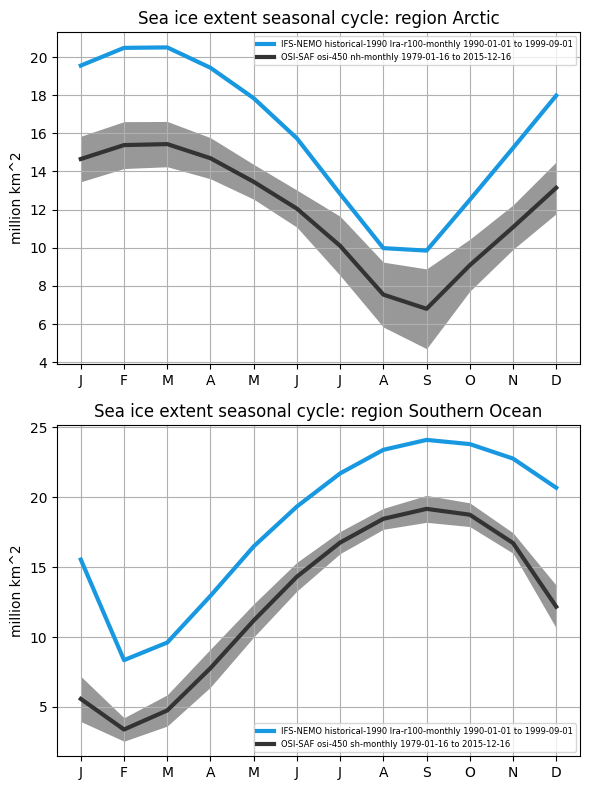

In [5]:
diagnostic.run()

## Methods

The method run() is the simplest way to run the diagnostic, but it is also possible to run the diagnostic step by step.

### 1. computeExtent

In [6]:
diagnostic.computeExtent()

2024-02-08 12:37:14 :: Seaice :: INFO     -> Retrieving data for IFS-NEMO historical-1990 lra-r100-monthly


2024-02-08 12:37:14 :: Reader :: INFO     -> No specific fix found, will call the default fix IFS-NEMO-default
2024-02-08 12:37:14 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-08 12:37:14 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-08 12:37:14 :: Reader :: ERROR    -> The requested deafult fixer name IFS-NEMO-default does not exist in fixes files
2024-02-08 12:37:14 :: Reader :: WARNING  -> No fixes available for model IFS-NEMO, experiment historical-1990, source lra-r100-monthly
2024-02-08 12:37:14 :: Reader :: INFO     -> Grid metadata is lon-lat
2024-02-08 12:37:14 :: Reader :: INFO     -> Retrieving variables: ['avg_siconc']
/LUMI_TYKKY_Id5XXYM/miniconda/envs/env1/lib/python3.11/site-packages/intake_xarray/base.py:21: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order 

### 2. plotExtent

2024-02-08 12:37:47 :: create_folder :: INFO     -> Folder /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/ already exists
2024-02-08 12:37:47 :: create_folder :: INFO     -> Folder /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/pdf/png already exists
2024-02-08 12:37:47 :: Seaice :: INFO     -> Saving figure SeaIceExtent_all_models.png
2024-02-08 12:37:47 :: Seaice :: INFO     -> Saving figure SeaIceExtentCycle_all_models.png
2024-02-08 12:37:48 :: create_folder :: INFO     -> Folder /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/pdf/pdf already exists
2024-02-08 12:37:48 :: Seaice :: INFO     -> Saving figure SeaIceExtent_all_models.pdf
2024-02-08 12:37:48 :: Seaice :: INFO     -> Saving figure SeaIceExtentCycle_all_models.pdf
2024-02-08 12:38:06 :: create_folder :: INFO     -> Folder /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/ already exists
2024

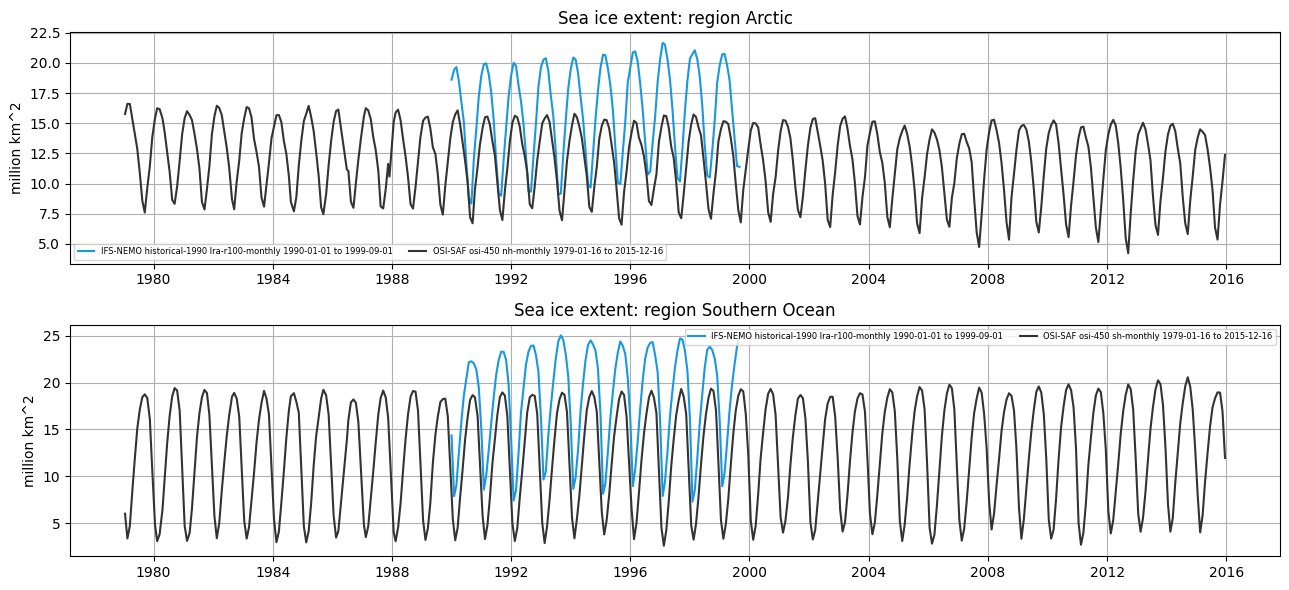

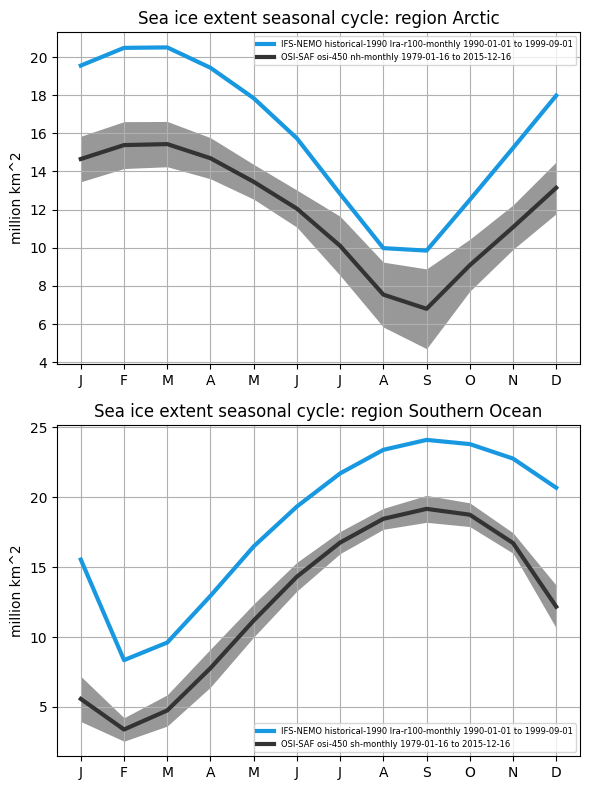

In [7]:
diagnostic.plotExtent()

### 3. createNetCDF

In [8]:
diagnostic.createNetCDF()

2024-02-08 12:38:16 :: create_folder :: INFO     -> Folder /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/netcdf already exists
2024-02-08 12:38:16 :: Seaice :: INFO     -> Saving NetCDF file /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/netcdf/IFS-NEMO_historical-1990_lra-r100-monthly_Arctic.nc
2024-02-08 12:38:16 :: Seaice :: INFO     -> Saving NetCDF file /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/netcdf/IFS-NEMO_historical-1990_lra-r100-monthly_Arctic.nc
2024-02-08 12:38:16 :: Seaice :: INFO     -> Saving NetCDF file /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/netcdf/IFS-NEMO_historical-1990_lra-r100-monthly_SouthernOcean.nc
2024-02-08 12:38:16 :: Seaice :: INFO     -> Saving NetCDF file /pfs/lustrep3/projappl/project_465000454/nurissom/AQUA/diagnostics/seaice/output/netcdf/OSI-SAF_osi-450_nh-monthly_Arctic.nc
2024-02-08 12:38:16 :: Seaice 